In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

## Question 1.  (40 pts)

This is an artificial data set. It has five features and let's explore clustering models on this data set.

In [2]:
data1=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/data1.csv")
data1.head()


,0,1,2,3,4
0,7.041668,0.679020,-8.408575,3.461746,-5.597806
1,-4.816582,-0.430385,0.753123,0.264526,3.965808
2,4.096806,-6.559957,-4.302680,-5.615232,5.635794
3,4.962203,-6.756521,-5.252219,-6.075322,2.754351
4,7.039362,0.263419,-7.505487,1.981984,-10.156349


#### 1. Visualize the data1 using PCA on a two dimensional plane and guess the number of clusters we could have from the plot. (5 pts)

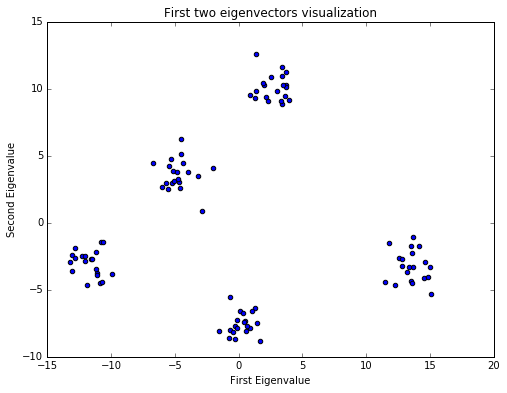

In [4]:
n=5 # how many eigenvectors we choose
X = data1
from sklearn.decomposition import PCA
pca = PCA(2)
Xproj = pca.fit_transform(X)
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(Xproj[:, 0], Xproj[:, 1], cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.title("First two eigenvectors visualization")
plt.show()

#### 2. Use silhouette_score and elbow method to justify the optimal number k of clusters for K-means clustering. Report the k and give a short explanation. (15 pts)

In [7]:
#silhouette_score
X=data1
range_n_clusters = [2, 3, 4, 5,6,7,8,9]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)#can change the model
    cluster_labels = km.fit_predict(X)
    #print cluster_labels
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.436009251691
For n_clusters =3, the average silhouette_score is :0.544062520653
For n_clusters =4, the average silhouette_score is :0.647634554445
For n_clusters =5, the average silhouette_score is :0.755843849066
For n_clusters =6, the average silhouette_score is :0.665684609888
For n_clusters =7, the average silhouette_score is :0.54165758185
For n_clusters =8, the average silhouette_score is :0.436431950053
For n_clusters =9, the average silhouette_score is :0.322970483728


In [8]:
#elbow method
from scipy.spatial.distance import cdist, pdist
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

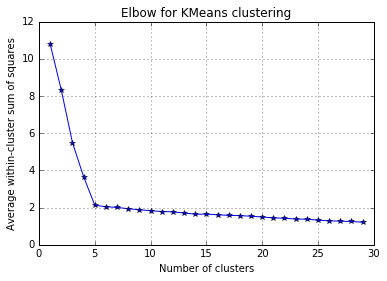

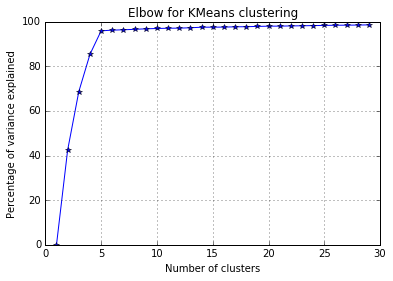

In [9]:
elbow(X, range(1,30))

### According to the silhouette score, when number of clusters = 5 the average silhouette score is 0.755843849066 which is the maxmium of all the results. And from the elbow plots when number of clusters = 5 the SSE decreases abruptly. Thus the number of clusters should be 5.


#### 3. Use K-means to cluster the data1 by the proper number of clusters k you found and report your result. (5 pts) 

In [87]:
n=5 # number of clusters
dd=Xproj #data
#tar=y # real target

#train the model.
km=KMeans(n_clusters=n)#random seed 324
res=km.fit(dd)
#result.
print(res.labels_)


[2 1 3 3 2 3 0 4 1 4 2 0 1 2 0 4 0 2 1 0 1 2 4 4 2 0 0 4 4 0 1 1 0 2 1 1 0
 3 1 4 2 3 4 4 0 3 1 3 3 4 1 0 0 4 3 2 2 1 2 3 4 2 0 1 3 2 2 2 4 1 2 0 3 3
 3 1 1 4 0 1 1 3 0 4 3 4 4 4 2 3 3 3 3 2 0 2 0 4 1 0]


### The data is divided into five groups (group 0 - group 4)

#### 4.  Visualize the clustering result. Please use the plot from part 1 and color the points by the new labels (the clustering results). (5 pts)

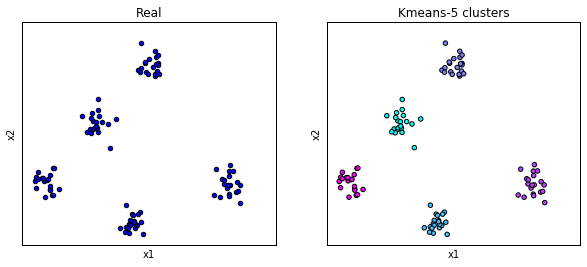

In [88]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(dd[:, 0], dd[:, 1], cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,2,2)
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)#c=color
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

#### 5. Use Guassian Mixture model instead of K-means with the same k and repeat the part 3 and 4. (10 pts)

In [17]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)

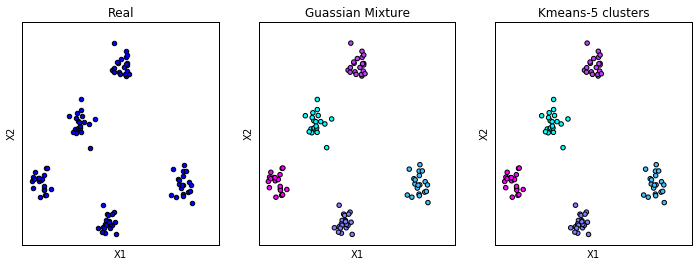

In [19]:
#Plot.
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(dd[:, 0], dd[:, 1], cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,3,2)
plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.subplot(1,3,3)
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

## Question 2 : (30 pts)

This homework assignment concerns NYPD police stops in New York City in the years 
2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can 
read more about these stops at 

https://en.wikipedia.org/wiki/Terry_stop 

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City 

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but 
unfortunately technical errors have resulted in some exact duplicate records.  You know 
there are around 1,000 unique stops in the file (there may be slightly more or slightly 
fewer).   


In [44]:
data2=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_duplicates_noid.csv")
data2.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6



#### 1. Use a clustering technique of your choice to determine how many unique records there are. (15 pts)

#### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?  (5 pts)

#### 3. Write a paragraph explaining what you did in parts a) and b)  (10 pts)

In [23]:
data2.columns

Index([u'year', u'found.weapon', u'found.gun', u'arrested', u'suspect.race',
       u'suspect.age', u'suspect.build', u'suspect.sex', u'suspect.height',
       u'suspect.weight', u'stopped.bc.desc', u'stopped.bc.violent',
       u'stopped.bc.other', u'stopped.bc.object', u'stopped.bc.casing',
       u'stopped.bc.lookout', u'stopped.bc.drugs', u'stopped.bc.clothing',
       u'stopped.bc.furtive', u'stopped.bc.bulge', u'precinct',
       u'inside.outside', u'location.housing', u'observation.period',
       u'officer.uniform', u'additional.report', u'additional.investigation',
       u'additional.proximity', u'additional.evasive',
       u'additional.associating', u'additional.direction',
       u'additional.highcrime', u'additional.time', u'additional.sights',
       u'additional.other', u'radio.run', u'day', u'month', u'time.period'],
      dtype='object')

In [28]:
data2.describe()

,year,suspect.age,suspect.height,suspect.weight,precinct,observation.period,time.period
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,2011.390084,25.883068,5.724353,169.232928,59.490178,2.016838,4.253508
std,0.487997,10.108512,0.243621,28.354217,29.049376,2.930803,1.861873
min,2011.000000,13.000000,4.750000,95.000000,1.000000,0.000000,1.000000
25%,2011.000000,19.000000,5.583333,150.000000,40.000000,1.000000,3.000000
50%,2011.000000,23.000000,5.750000,165.000000,49.000000,1.000000,5.000000
75%,2012.000000,31.000000,5.833333,180.000000,77.000000,2.000000,6.000000
max,2012.000000,70.000000,6.916667,380.000000,122.000000,38.000000,6.000000


In [53]:
set(data2["suspect.race"])

{'asian', 'black', 'hispanic', 'native.american', 'other', 'white'}

In [56]:
for i in data2.index:
    if data2['suspect.race'][i] == 'asian' :
        data2['suspect.race'][i] = 0
    elif data2['suspect.race'][i] == 'black':
        data2['suspect.race'][i] = 1
    elif data2['suspect.race'][i] == 'hispanic':
        data2['suspect.race'][i] = 2
    elif data2['suspect.race'][i] == 'native.american':
        data2['suspect.race'][i] = 3
    elif data2['suspect.race'][i] == 'other':
        data2['suspect.race'][i] = 4
    elif data2['suspect.race'][i] == 'white':
        data2['suspect.race'][i] = 5

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is tryi

In [57]:
data2.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,1,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,0,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,1,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6
3,2011,False,False,False,1,23,medium,male,5.916667,180,...,False,False,False,True,False,False,False,Friday,April,1
4,2011,False,False,False,1,33,thin,male,5.666667,175,...,False,False,False,False,False,False,False,Thursday,December,4


In [58]:
set(data2["suspect.build"])

{'heavy', 'medium', 'muscular', 'thin', 'unknown'}

In [61]:
for i in data2.index:
    if data2['suspect.build'][i] == 'heavy':
        data2['suspect.build'][i] =0
    elif data2['suspect.build'][i] == 'medium':
        data2['suspect.build'][i] =1
    elif data2['suspect.build'][i] == 'muscular':
        data2['suspect.build'][i] =2
    elif data2['suspect.build'][i] == 'thin':
        data2['suspect.build'][i] =3
    elif data2['suspect.build'][i] == 'unknown':
        data2['suspect.build'][i] =4

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCo

In [62]:
set(data2["day"])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [63]:
for i in data2.index:
    if data2['day'][i] == 'Sunday':
        data2['day'][i] =0
    elif data2['day'][i] == 'Monday':
        data2['day'][i] =1
    elif data2['day'][i] == 'Tuesday':
        data2['day'][i] =2
    elif data2['day'][i] == 'Wednesday':
        data2['day'][i] =3
    elif data2['day'][i] == 'Thursday':
        data2['day'][i] =4
    elif data2['day'][i] == 'Friday':
        data2['day'][i] =5
    elif data2['day'][i] == 'Saturday':
        data2['day'][i] =6

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is try

In [64]:
set(data2["month"])

{'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September'}

In [74]:
for i in data2.index:
    if data2['month'][i] == 'January':
        data2['month'][i] =0
    elif data2['month'][i] == 'February':
        data2['month'][i] =1
    elif data2['month'][i] == 'March':
        data2['month'][i] =2
    elif data2['month'][i] == 'April':
        data2['month'][i] =3
    elif data2['month'][i] == 'May':
        data2['month'][i] =4
    elif data2['month'][i] == 'June':
        data2['month'][i] =5
    elif data2['month'][i] == 'July':
        data2['month'][i] =6
    elif data2['month'][i] == 'August':
        data2['month'][i] =7
    elif data2['month'][i] == 'September':
        data2['month'][i] =8
    elif data2['month'][i] == 'October':
        data2['month'][i] =9
    elif data2['month'][i] == 'November':
        data2['month'][i] =10
    elif data2['month'][i] == 'December':
        data2['month'][i] =11

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [68]:
for i in data2.index:
    if data2['suspect.sex'][i] == 'male':
        data2['suspect.sex'][i] =0
    elif data2['suspect.sex'][i] == 'female':
        data2['suspect.sex'][i] =1

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
set(data2["location.housing"])

{'housing', 'neither', 'transit'}

In [71]:
for i in data2.index:
    if data2['location.housing'][i] == 'neither':
        data2['location.housing'][i] =0
    elif data2['location.housing'][i] == 'transit':
        data2['location.housing'][i] =1
    elif data2['location.housing'][i] == 'housing':
        data2['location.housing'][i] =2

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
data2 = data2.astype(int)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,0,0,0,1,27,1,0,5,180,...,0,0,0,0,0,0,0,6,0,6
1,2011,0,0,0,0,40,1,0,6,225,...,0,0,1,1,0,0,0,5,10,6
2,2012,0,0,0,1,20,1,0,6,200,...,0,0,0,0,0,0,0,6,7,6
3,2011,0,0,0,1,23,1,0,5,180,...,0,0,0,1,0,0,0,5,3,1
4,2011,0,0,0,1,33,3,0,5,175,...,0,0,0,0,0,0,0,4,11,4
5,2011,0,0,0,1,62,1,0,5,178,...,0,0,1,1,0,0,0,0,10,4
6,2012,0,0,0,1,18,1,0,5,165,...,0,1,0,1,0,0,0,4,2,6
7,2012,0,0,1,1,32,3,0,5,160,...,0,0,1,1,0,0,0,5,4,5
8,2011,0,0,0,1,18,3,0,5,130,...,0,1,0,0,0,0,0,5,7,1
9,2012,0,0,0,1,18,3,0,5,120,...,1,0,1,1,0,0,0,3,1,4


### 1. Use a clustering technique of your choice to determine how many unique records there are. (15 pts)

In [77]:
KM = KMeans(len(data2)).fit(data2)
data2["labels"] = KM.predict(data2)
len(set(data2["labels"]))

997

### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward). How well did your clustering technique perform? (5 pts)

In [57]:
data2.drop_duplicates()
data2.shape

NameError: name 'data2' is not defined

### 3. Write a paragraph explaining what you did in parts a) and b) (10 pts)

In [ ]:
Converage all the string and boolen information in data2 into integer
Using KMeans to find out how many unique records we have 


### Question 3: 311 data (30 pts)

The 311 data is not new for us. Let us use the scaled 311 data for question 3.

Be careful! The first three columns are : zip code(zip_code), the average income(mean), and the average housing price(sale_price) 

In [33]:
data3=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session06/example4.csv").iloc[:,2:]
data3=pd.concat((data3.loc[:,["zip_code","mean","sale_price"]],data3.loc[:,"Adopt A Basket":]),axis=1)
data3.head(3)

,zip_code,mean,sale_price,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,11356,80098.0,600000,0.0,0.027721,0.0,0.0,0.000770,0.000257,0.001027,...,0.000000,0.000000,0.000000,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,10017,149723.0,5200000,0.0,0.010675,0.0,0.0,0.000227,0.000227,0.003861,...,0.000227,0.000227,0.000000,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0
2,11413,84085.0,100000,0.0,0.002511,0.0,0.0,0.001076,0.001973,0.000359,...,0.000000,0.000000,0.004484,0.000000,0.000179,0.007354,0.001256,0.069058,0.0,0.0


#### 1. Use Kmeans clustering model to cluster NYC zip codes into FOUR clusters. The feature space is the scaled 311 complaints data (from "Adopt A Basket" to the end. Please do not include "mean" and "sale_price" ) as provided.  Report the number of zip codes in each clusters. (10 pts)

#### 2. Calculate the average income and average housing price for each cluster you get from part 1. (10 pts)

#### 3. Visulize the clustering result on the map (For this part you need to use the shapefiles of NY).  (10 pts)

In [34]:
data31 = data3.loc[:,"Adopt A Basket":]

In [35]:
data31.head()

,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,Beach Pool Sauna Complaint,BEST Site Safety,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,0.000000,0.027721,0.0,0.000000,0.000770,0.000257,0.001027,0.001797,0.001540,0.000000,...,0.000000,0.000000,0.000000,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,0.000000,0.010675,0.0,0.000000,0.000227,0.000227,0.003861,0.000000,0.001363,0.000000,...,0.000227,0.000227,0.000000,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0
2,0.000000,0.002511,0.0,0.000000,0.001076,0.001973,0.000359,0.000000,0.000359,0.000000,...,0.000000,0.000000,0.004484,0.000000,0.000179,0.007354,0.001256,0.069058,0.0,0.0
3,0.000000,0.001476,0.0,0.000000,0.000170,0.006756,0.000738,0.000057,0.000227,0.000114,...,0.000170,0.000170,0.000908,0.000568,0.000170,0.000454,0.000341,0.012433,0.0,0.0
4,0.000049,0.001671,0.0,0.000049,0.000344,0.006143,0.000688,0.000000,0.000541,0.000049,...,0.000491,0.000197,0.005897,0.000590,0.000393,0.001622,0.000442,0.037445,0.0,0.0


### 1. Use Kmeans clustering model to cluster NYC zip codes into FOUR clusters. The feature space is the scaled 311 complaints data (from "Adopt A Basket" to the end. Please do not include "mean" and "sale_price" ) as provided. Report the number of zip codes in each clusters. (10 pts)


In [36]:
n=4 # number of clusters
dd=data31 #data

#train the model.
km=KMeans(n_clusters=n)#random seed 324
res=km.fit(dd)

print(res.labels_)
type(res)

[0 1 0 ..., 3 1 3]


sklearn.cluster.k_means_.KMeans

In [37]:
data3["clusters"] = res.labels_

In [38]:
data3.head()


,zip_code,mean,sale_price,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,...,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment,clusters
0,11356,80098.0,600000,0.000000,0.027721,0.0,0.000000,0.000770,0.000257,0.001027,...,0.000000,0.000000,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0,0
1,10017,149723.0,5200000,0.000000,0.010675,0.0,0.000000,0.000227,0.000227,0.003861,...,0.000227,0.000000,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0,1
2,11413,84085.0,100000,0.000000,0.002511,0.0,0.000000,0.001076,0.001973,0.000359,...,0.000000,0.004484,0.000000,0.000179,0.007354,0.001256,0.069058,0.0,0.0,0
3,11213,46614.0,775000,0.000000,0.001476,0.0,0.000000,0.000170,0.006756,0.000738,...,0.000170,0.000908,0.000568,0.000170,0.000454,0.000341,0.012433,0.0,0.0,2
4,11207,44634.0,151000,0.000049,0.001671,0.0,0.000049,0.000344,0.006143,0.000688,...,0.000197,0.005897,0.000590,0.000393,0.001622,0.000442,0.037445,0.0,0.0,2


In [70]:
data3["zip_code"].groupby(data3["clusters"]).count()

clusters
0    789
1    604
2    236
3    746
Name: zip_code, dtype: int64

### 2. Calculate the average income and average housing price for each cluster you get from part 1. (10 pts)

In [39]:
data3["sale_price"].groupby(data3["clusters"]).mean()

clusters
0     405056
1    1067469
2     543800
3     515299
Name: sale_price, dtype: int64

In [40]:
data3["mean"].groupby(data3["clusters"]).mean()

clusters
0    73310.022814
1    70885.786424
2    56105.538136
3    88758.936997
Name: mean, dtype: float64

### 3. Visulize the clustering result on the map (For this part you need to use the shapefiles of NY). (10 pts)

In [41]:
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

zipsf = shp.Reader('NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

In [47]:
#for plotting our result
def plot_on_map(result):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'zip_code']
        x[key]=result.loc[i,'clusters']

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+1))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("clustering result on map")

    import matplotlib.patches as mpatches
    clum_num=len(result.iloc[:,-1].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.show()

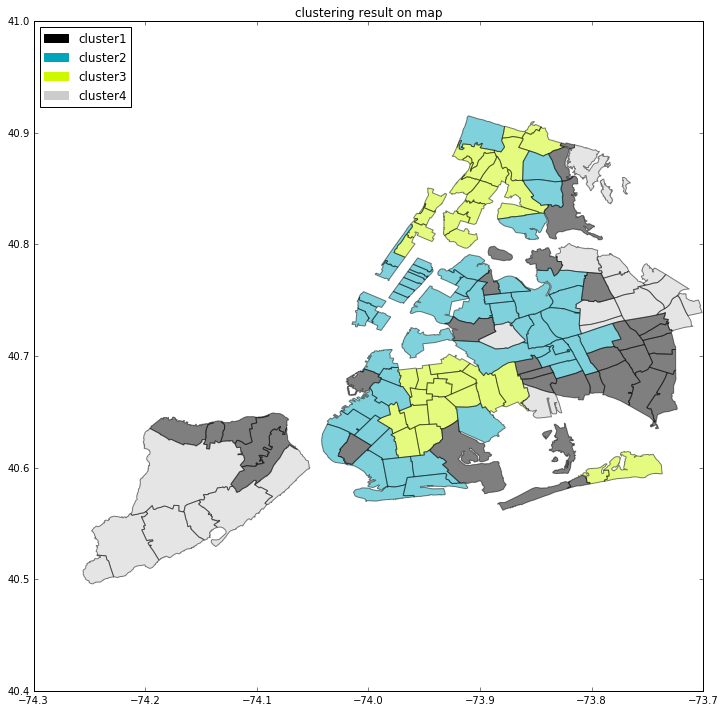

In [48]:
plot_on_map(data3[['zip_code','clusters']])

#### Bonus question. (30 pts)
Continue from Question 2:

You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but 
unfortunately technical errors have resulted in some almost duplicate records (that is, 
there are some records that are duplicates of others except for slight variations in two 
features).  You know there are around 1,000 unique stops in the file (there may be 
slightly more or slightly fewer). 



In [59]:
data4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_errors_noid.csv")
data4.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4


#### 1. Which are the two features where errors were introduced? (15 pts) 

#### 2. How many unique records there are? (10 pts)

#### 3. Write a paragraph explaining what you did. (5 pts)

In [60]:

for i in data4.index:
    if data4['suspect.race'][i] == 'asian' :
        data4['suspect.race'][i] = 0
    elif data4['suspect.race'][i] == 'black':
        data4['suspect.race'][i] = 1
    elif data4['suspect.race'][i] == 'hispanic':
        data4['suspect.race'][i] = 2
    elif data4['suspect.race'][i] == 'native.american':
        data4['suspect.race'][i] = 3
    elif data4['suspect.race'][i] == 'other':
        data4['suspect.race'][i] = 4
    elif data4['suspect.race'][i] == 'white':
        data4['suspect.race'][i] = 5


/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is tryin

In [61]:
for i in data4.index:
    if data4['suspect.build'][i] == 'heavy':
        data4['suspect.build'][i] =0
    elif data4['suspect.build'][i] == 'medium':
        data4['suspect.build'][i] =1
    elif data4['suspect.build'][i] == 'muscular':
        data4['suspect.build'][i] =2
    elif data4['suspect.build'][i] == 'thin':
        data4['suspect.build'][i] =3
    elif data4['suspect.build'][i] == 'unknown':
        data4['suspect.build'][i] =4



/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCop

In [62]:
for i in data4.index:
    if data4['day'][i] == 'Sunday':
        data4['day'][i] =0
    elif data4['day'][i] == 'Monday':
        data4['day'][i] =1
    elif data4['day'][i] == 'Tuesday':
        data4['day'][i] =2
    elif data4['day'][i] == 'Wednesday':
        data4['day'][i] =3
    elif data4['day'][i] == 'Thursday':
        data4['day'][i] =4
    elif data4['day'][i] == 'Friday':
        data4['day'][i] =5
    elif data4['day'][i] == 'Saturday':
        data4['day'][i] =6


/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is tryin

In [63]:
for i in data4.index:
    if data4['month'][i] == 'January':
        data4['month'][i] =0
    elif data4['month'][i] == 'February':
        data4['month'][i] =1
    elif data4['month'][i] == 'March':
        data4['month'][i] =2
    elif data4['month'][i] == 'April':
        data4['month'][i] =3
    elif data4['month'][i] == 'May':
        data4['month'][i] =4
    elif data4['month'][i] == 'June':
        data4['month'][i] =5
    elif data4['month'][i] == 'July':
        data4['month'][i] =6
    elif data4['month'][i] == 'August':
        data4['month'][i] =7
    elif data4['month'][i] == 'September':
        data4['month'][i] =8
    elif data4['month'][i] == 'October':
        data4['month'][i] =9
    elif data4['month'][i] == 'November':
        data4['month'][i] =10
    elif data4['month'][i] == 'December':
        data4['month'][i] =11


/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWith

In [64]:
for i in data4.index:
    if data4['location.housing'][i] == 'neither':
        data4['location.housing'][i] =0
    elif data4['location.housing'][i] == 'transit':
        data4['location.housing'][i] =1
    elif data4['location.housing'][i] == 'housing':
        data4['location.housing'][i] =2


/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
for i in data4.index:
    if data4['suspect.sex'][i] == 'male':
        data4['suspect.sex'][i] =0
    elif data4['suspect.sex'][i] == 'female':
        data4['suspect.sex'][i] =1

/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cuichenxi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
data4 = data4.astype(int)
data4.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,0,0,0,1,20,0,0,5,200,...,0,0,1,0,0,0,0,3,10,4
1,2012,0,0,0,1,24,1,0,5,155,...,0,0,1,0,0,0,0,1,7,6
2,2011,0,0,0,1,47,0,0,6,245,...,0,1,1,1,0,0,0,6,0,4
3,2012,0,0,0,3,14,3,0,5,140,...,0,1,1,0,0,0,0,2,9,4
4,2012,0,0,0,2,21,1,0,5,145,...,1,1,1,1,0,0,0,2,5,5


### Which are the two features where errors were introduced? (15 pts)

In [55]:
for colu in data4.columns:
    data4[colu].drop_duplicates()